In [114]:
import pandas as pd
import seaborn as sns
import numpy as np

In [123]:
df = pd.read_csv('data1/auto-mpg.csv', header=None)

In [124]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<Axes: xlabel='weight', ylabel='mpg'>

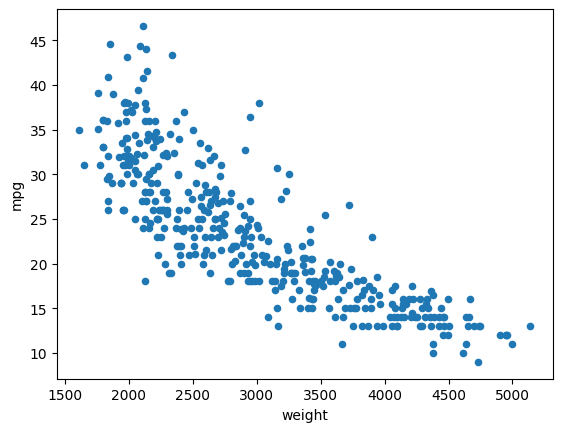

In [15]:
# 산점도 scatter
df.plot(x='weight', y = 'mpg', kind='scatter')

In [16]:
# 열을 선택해서 박스 플롯 그리기
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: >

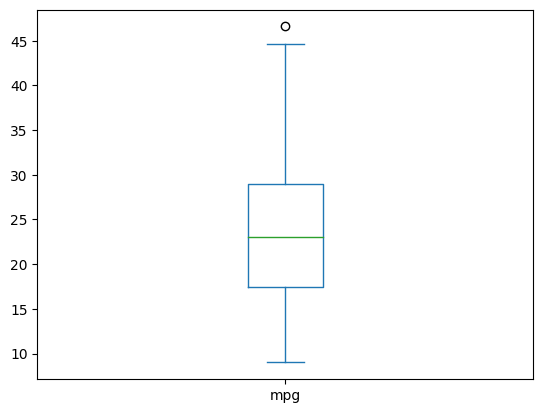

In [18]:
df[['mpg']].plot(kind='box')

<Axes: >

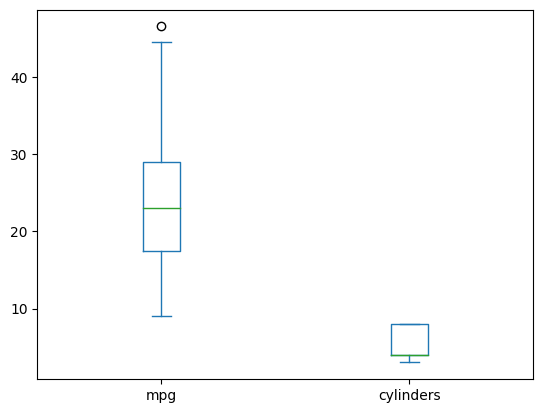

In [19]:
df[['mpg', 'cylinders']].plot(kind='box')

# 시도별 전출입 인구수 데이터 시각화

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df1 =pd.read_excel('data1/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [5]:
df1.head(4) # default 5개 숫자를 넣으면 갯수만큼 출력

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    19 non-null     object
 1   전입지별    325 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    325 non-null    object
 17  1985    325 non-null    object
 18  1986    325 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [7]:
# 누락값(NaN)을 앞 데이터로 채움
df1 = df1.fillna(method='ffill') # fforward 로 fill을 함

In [8]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df1['전출지별'] == '서울특별시') & (df1['전입지별'] != '서울특별시')

In [9]:
df_seoul = df1[mask]
df_seoul.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


In [10]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.head(3)

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


In [11]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


In [12]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

In [13]:
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

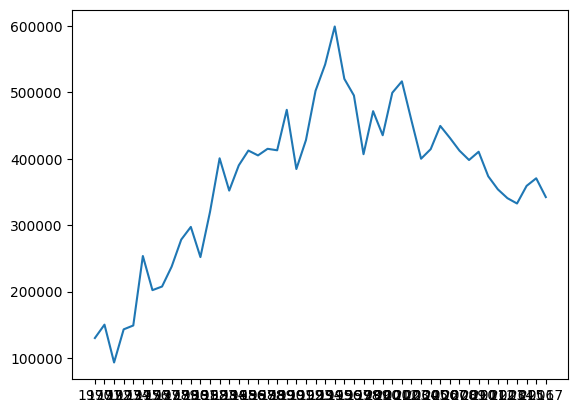

In [14]:
plt.plot(sr_one.index, sr_one.values)

c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HAN

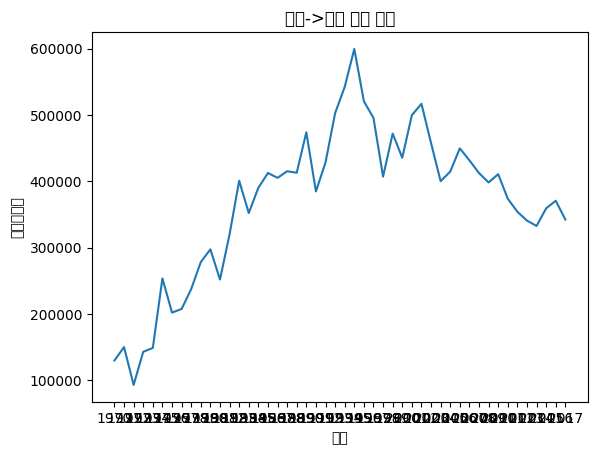

In [15]:
plt.plot(sr_one)
#차트의 제목을 추가
plt.title('서울->경기 인구 이동')
# 축의 이름
plt.xlabel('기간')
plt.ylabel('이동인구수')
plt.show() # 변경사항을 저장하고 그래프로 출력

In [16]:
import numpy as np
from matplotlib import font_manager, rc
import matplotlib as mpl
# minus 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

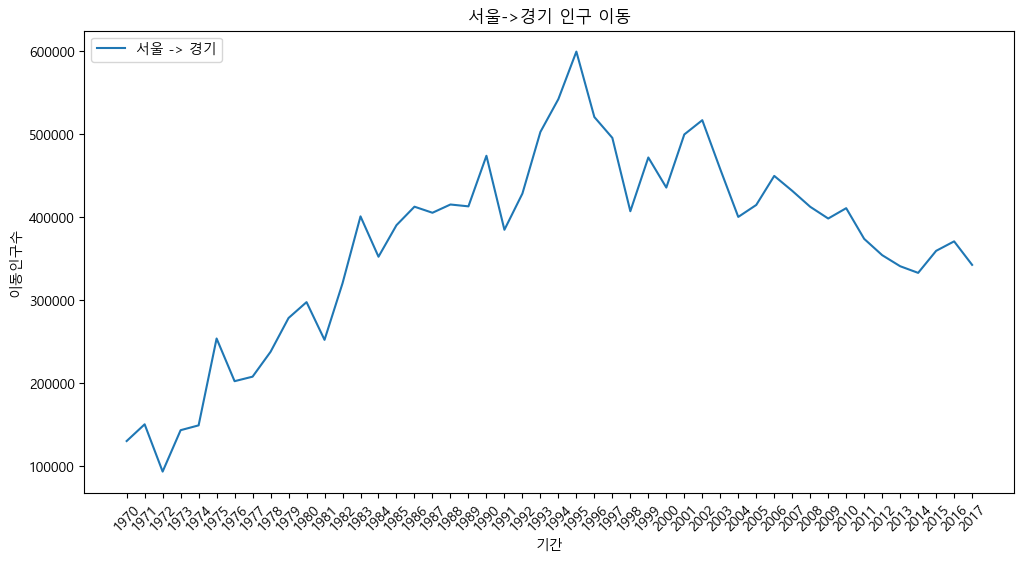

In [17]:
plt.figure(figsize=(12,6)) #그림사이즈(가로인치, 세로인치)
plt.plot(sr_one.index, sr_one.values)
#차트의 제목을 추가
plt.title('서울->경기 인구 이동')
# 축의 이름
plt.xlabel('기간')
plt.xticks(rotation=45)
plt.ylabel('이동인구수')
# 범례
plt.legend(labels=['서울 -> 경기'], loc='upper left')
plt.show() # 변경사항을 저장하고 그래프로 출력
# 'best' = 0
# 'upper right' = 1
# 'upper left' = 2
# 'lower right' = 3
# 'lower left' = 4
# 'right' = 5
# 'right' = 6

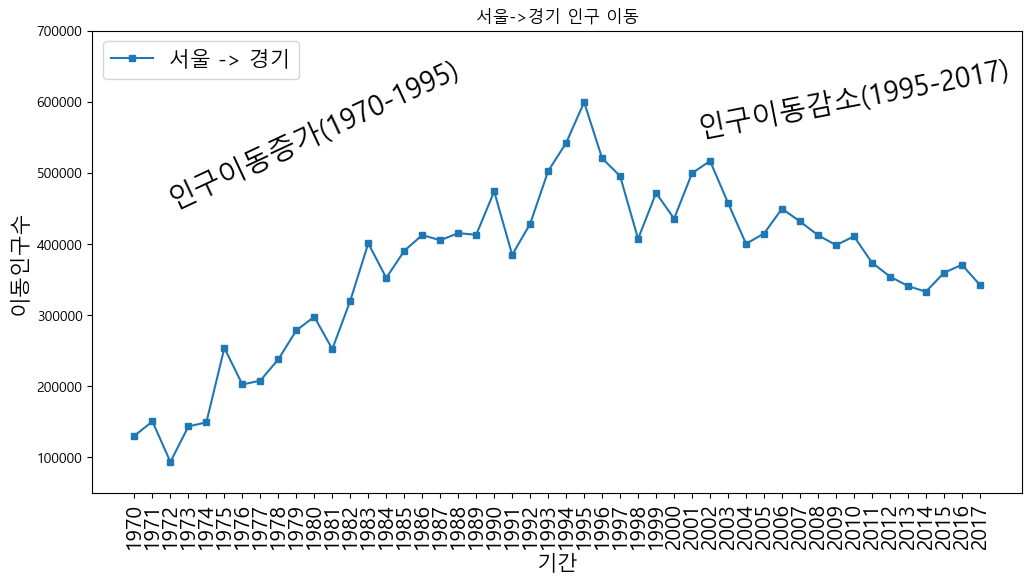

In [24]:
plt.figure(figsize=(12,6))
plt.plot(sr_one.index, sr_one.values, marker ='s', markersize =5)
plt.title('서울->경기 인구 이동')
plt.xlabel('기간', size=15)
plt.xticks(size=15, rotation=90) # X축 눈금라벨 사이즈
plt.ylabel('이동인구수', size=15)
plt.ylim(50000, 700000) # y축의 범위지정(최소값, 최대값)
plt.legend(fontsize=15, labels=['서울 -> 경기'], loc='upper left') # 범례 사이즈

# 주석표시
plt.annotate('인구이동증가(1970-1995)', #텍스트입력
             xy=(10, 450000), # 텍스트 위치 기준점
            rotation=25, # 텍스트 회전각도
            va='baseline', # 텍스트의 상하정렬
            ha='center', # 텍스트의 좌우정렬
            fontsize=20) 
plt.annotate('인구이동감소(1995-2017)', #텍스트입력
             xy=(40, 550000), # 텍스트 위치 기준점
            rotation=11, # 텍스트 회전각도
            va='baseline', # 텍스트의 상하정렬
            ha='center', # 텍스트의 좌우정렬
            fontsize=20) 
plt.show() 

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\2591526056.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\2591526056.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


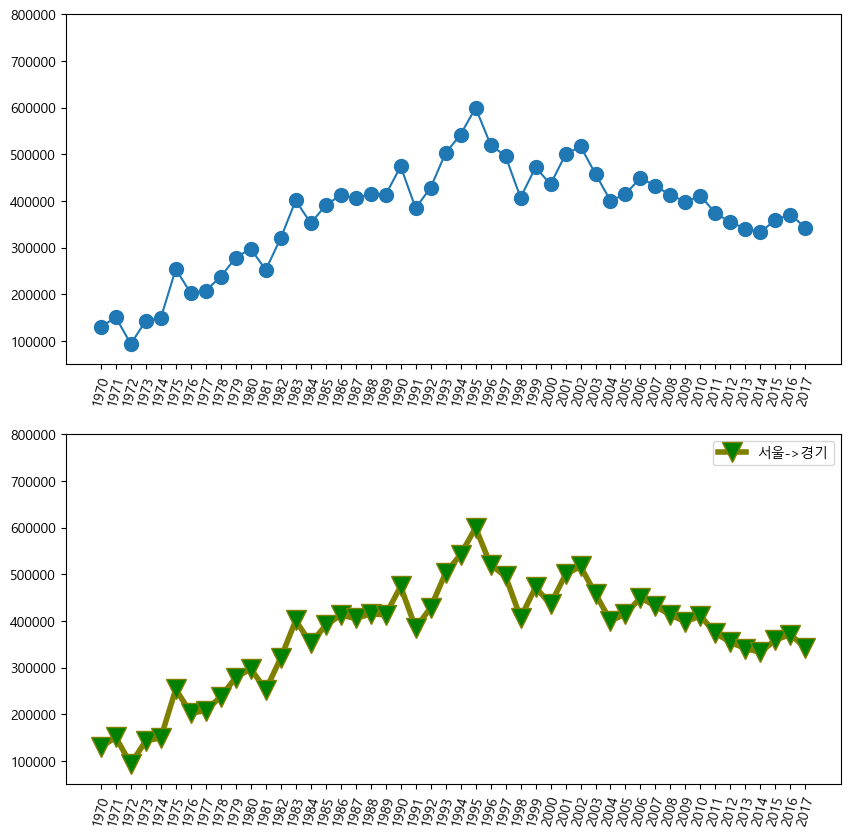

In [25]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, marker ='o', markersize =10)
ax2.plot(sr_one, marker ='v', markerfacecolor='green',
        markersize=15, color='olive', linewidth=4,
        label='서울->경기')
ax2.legend(loc='best')
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)
plt.show()

In [26]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구데이터 값
col_years = list(map(str, range(1970,2018)))
df3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\3390330763.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


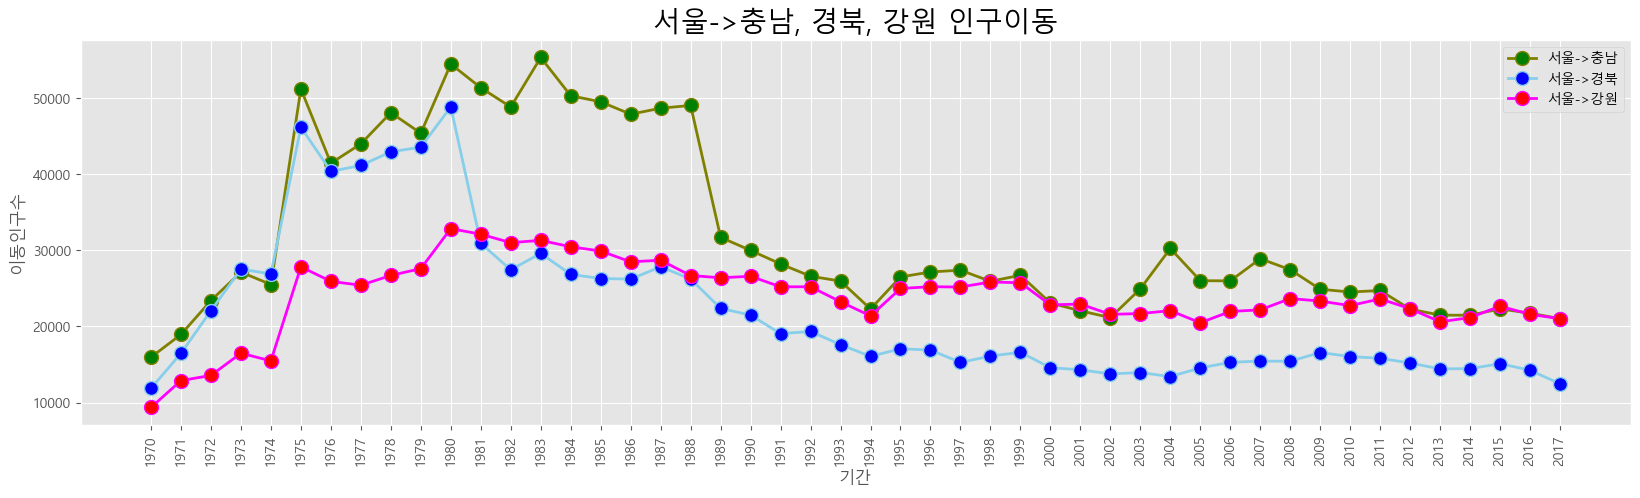

In [36]:
# 스타일 서식 지정
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(col_years, df3.loc['충청남도', :], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울->충남')
ax.plot(col_years, df3.loc['경상북도', :], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax.plot(col_years, df3.loc['강원도', :], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울->강원')
ax.legend(loc='best')
ax.set_title('서울->충남, 경북, 강원 인구이동', size=20)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동인구수', size=12)
ax.set_xticklabels(col_years, rotation=90)
plt.show()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\1274435148.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90, size=5)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\1274435148.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90, size=5)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\1274435148.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90, size=5)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\1274435148.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90, size=5)


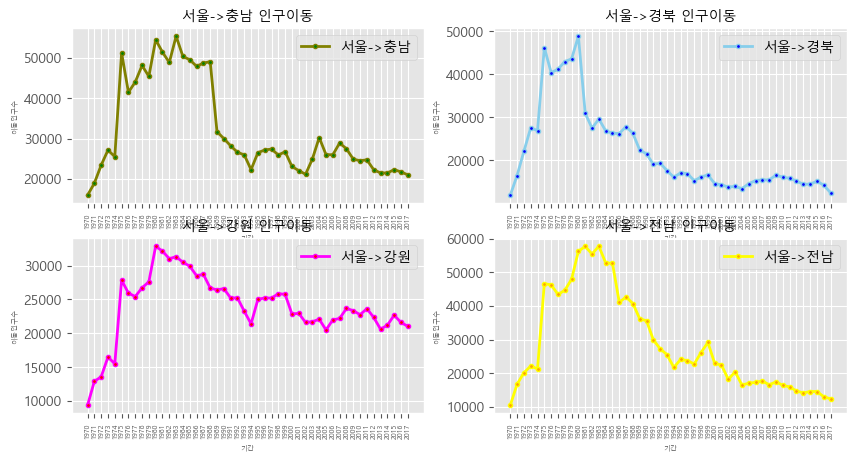

In [75]:
# df4 df3의 3개 지역과 전라남도를 추가
# ax1 = sub_plot(2, 2, 1), ax2 = sub_plot(2, 2, 2), ax3 = sub_plot(2, 2, 3), ax4 = sub_plot(2, 2, 4)
df4 = df_seoul.loc[['충청남도', '경상북도', '강원도','전라남도'], col_years]
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(col_years, df4.loc['충청남도', :], marker='o', markerfacecolor='green', 
        markersize=3, color='olive', linewidth=2, label='서울->충남')
ax1.legend(loc='best')
ax1.set_title('서울->충남 인구이동', size=10)
ax1.set_xlabel('기간', size=5)
ax1.set_ylabel('이동인구수', size=5)
ax1.set_xticklabels(col_years, rotation=90, size=5)

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(col_years, df4.loc['경상북도', :], marker='o', markerfacecolor='blue', 
        markersize=3, color='skyblue', linewidth=2, label='서울->경북')
ax2.legend(loc='best')
ax2.set_title('서울->경북 인구이동', size=10)
ax2.set_xlabel('기간', size=5)
ax2.set_ylabel('이동인구수', size=5)
ax2.set_xticklabels(col_years, rotation=90, size=5)

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(col_years, df4.loc['강원도', :], marker='o', markerfacecolor='red', 
        markersize=3, color='magenta', linewidth=2, label='서울->강원')
ax3.legend(loc='best')
ax3.set_title('서울->강원 인구이동', size=10)
ax3.set_xlabel('기간', size=5)
ax3.set_ylabel('이동인구수', size=5)
ax3.set_xticklabels(col_years, rotation=90, size=5)

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(col_years, df4.loc['전라남도', :], marker='o', markerfacecolor='orange', 
        markersize=3, color='yellow', linewidth=2, label='서울->전남')
ax4.legend(loc='best')
ax4.set_title('서울->전남 인구이동', size=10)
ax4.set_xlabel('기간', size=5)
ax4.set_ylabel('이동인구수', size=5)
ax4.set_xticklabels(col_years, rotation=90, size=5)
plt.show()

In [78]:
# 색에 헥사코드가 있음
import matplotlib
colors={}
for name, hex in matplotlib.colors.cnames.items():
    colors[name] =hex

In [79]:
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [80]:
df4 = df4.T

In [81]:
df4.head()
df4.index = df4.index.map(int)

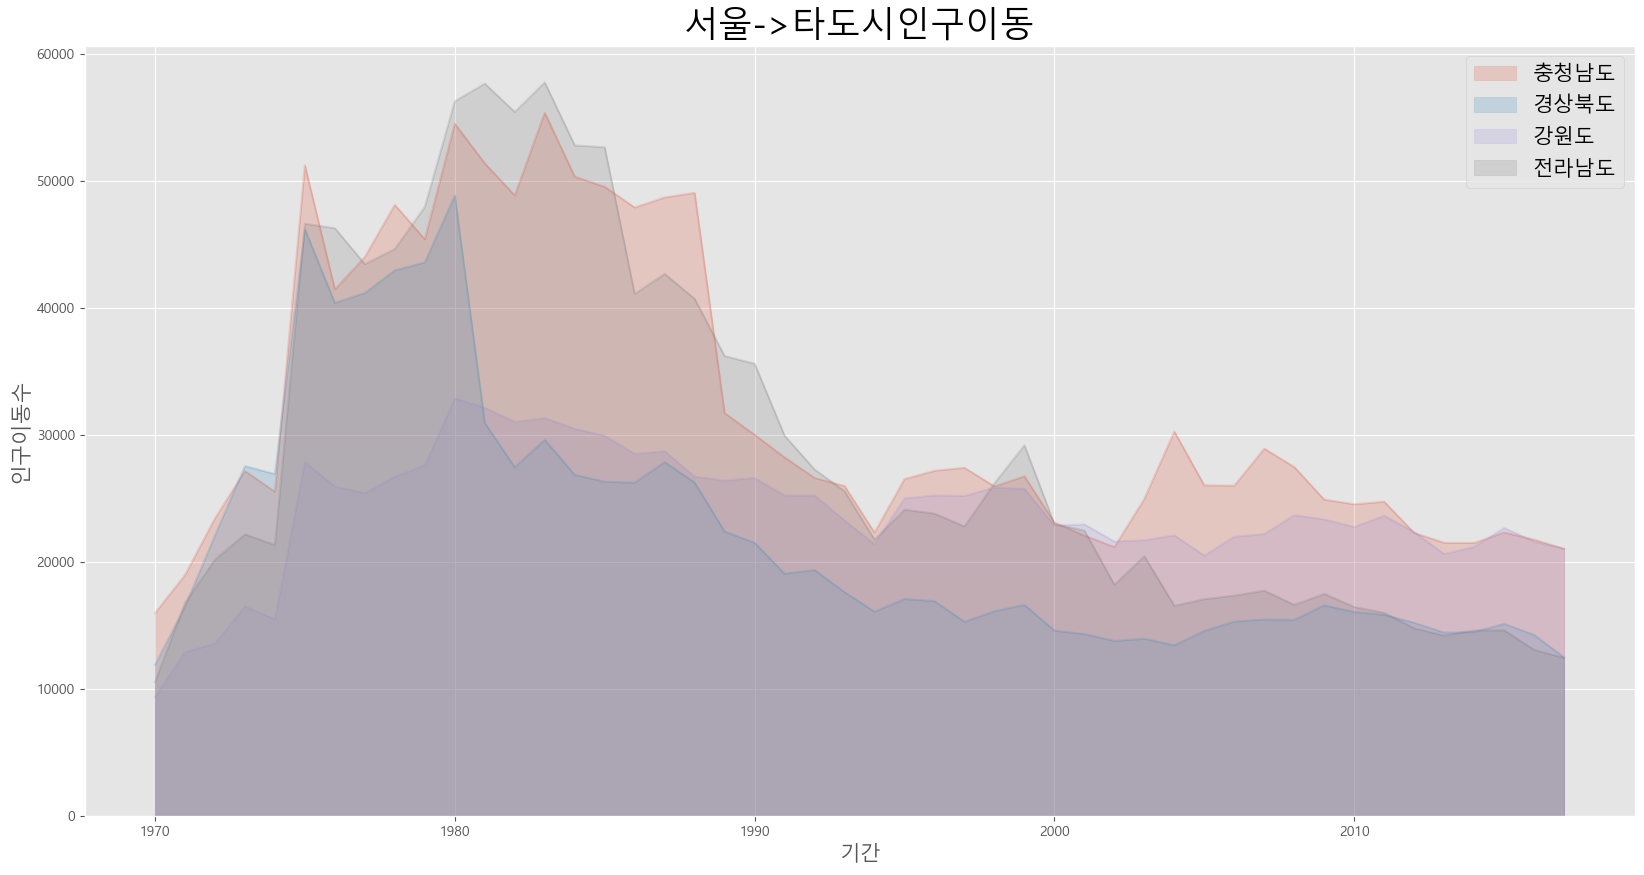

In [82]:
# 면적그래프를 그리기
df4.plot(kind = 'area', stacked=False, alpha=0.2, figsize=(20,10))
#alpha는 투명도 stacked는 선그래프가 누적되지 않고 서로 겹치도록
plt.title('서울->타도시인구이동', size=25)
plt.ylabel('인구이동수',size=15)
plt.xlabel('기간', size=15)
plt.legend(loc='best', fontsize=15)
plt.show()

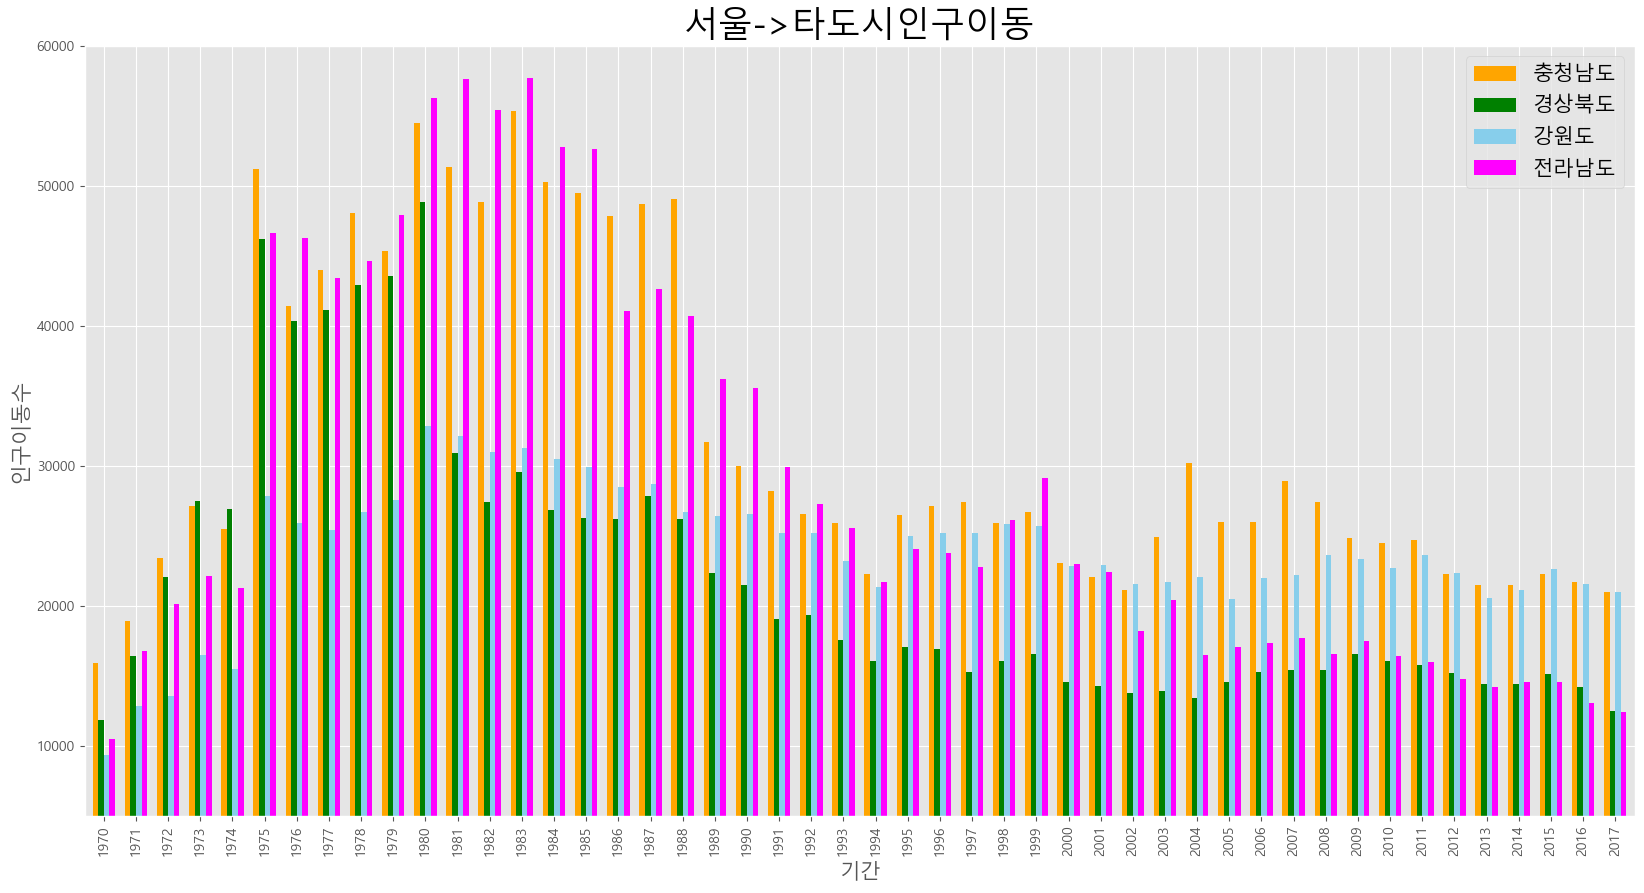

In [89]:
# bar
df4.plot(kind = 'bar', figsize=(20,10), width=0.7, color=['orange', 'green', 'skyblue', 'magenta'])
#alpha는 투명도 stacked는 선그래프가 누적되지 않고 서로 겹치도록
plt.title('서울->타도시인구이동', size=25)
plt.ylabel('인구이동수',size=15)
plt.xlabel('기간', size=15)
plt.ylim(5000,60000)
plt.legend(loc='best', fontsize=15)
plt.show()

In [92]:
df4 =df4.T

In [95]:
df4['합계'] = df4.sum(axis = 1)

In [96]:
df4.head(2)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,24889,24522,24723,22269,21486,21473,22299,21741,21020,1529273.0
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,16569,16042,15818,15191,14420,14456,15113,14236,12464,1052175.0


In [105]:
#합계의 가장 큰 값부터 정렬
df4_total = df4[['합계']].sort_values(by='합계', ascending=True)

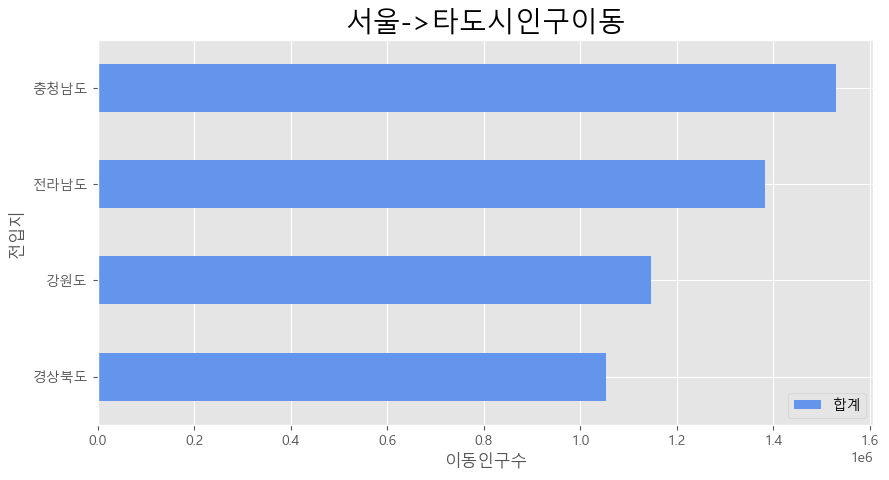

In [110]:
plt.style.use('ggplot')
# barh
df4_total.plot(kind = 'barh', figsize=(10,5), width=0.5, color='cornflowerblue')
#alpha는 투명도 stacked는 선그래프가 누적되지 않고 서로 겹치도록
plt.title('서울->타도시인구이동', size=20)
plt.ylabel('전입지')
plt.xlabel('이동인구수')
plt.show()

# 남북한 전력량으로 secondary_y를 그리기

In [118]:
df = pd.read_excel('./data1/남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)
df.head(2)
df = df.loc[5:9]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\2163164436.py:1: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('./data1/남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)


In [120]:
df.head(3)

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111


In [122]:
df.drop("전력량 (억㎾h)", axis='columns', inplace=True)
df.head(3)

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111


In [124]:
# 인덱스를 '발전 전력별'로 변경
df.set_index('발전 전력별', inplace=True)

In [125]:
df = df.T
df.head(2)

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-


In [126]:
# 증감율 (변동률) 계산
df = df.rename(columns={'합계':'총발전량'})

In [128]:
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df.head(2)

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년
1990,277,156,121,-,None
1991,263,150,113,-,277


In [130]:
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100
df.head(2)

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152


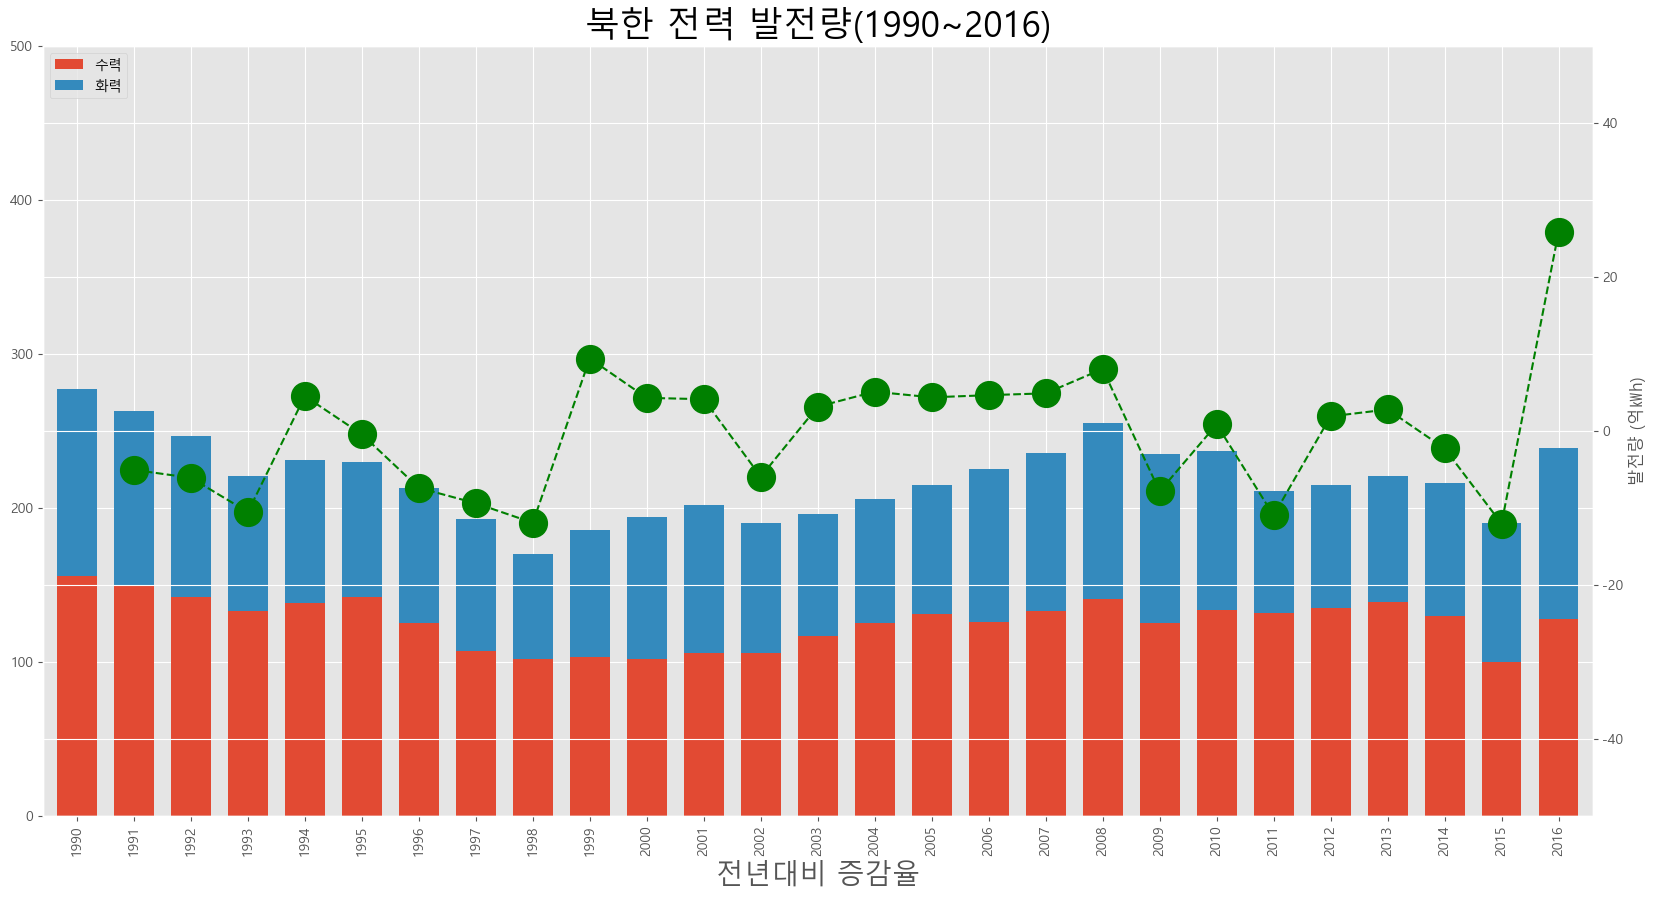

In [133]:
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls = '--', marker='o', markersize=20,
        color='green', label = '전년대비 증감율(%)')

#ls는 라인스타일
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax2.set_ylabel('발전량 (억㎾h)')
ax1.set_xlabel('전년대비 증감율')
plt.title('북한 전력 발전량(1990~2016)', size=25)
ax1.legend(loc='upper left')
plt.show()

In [134]:
#히스토그램 - 단변수 데이터의 빈도수를 나타냄
df = pd.read_csv('./data1/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

In [135]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


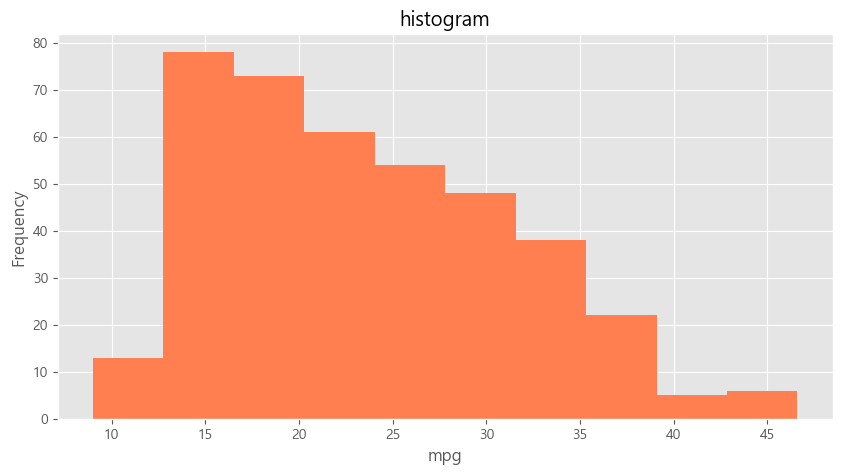

In [142]:
# 연비(mpg) 열에 대한 히스토그램을 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))
# bins=10운 bpg 10 ~ 50 정의 값을 10구간으로나눈다
# 그래프 꾸미기
plt.title('histogram')
plt.xlabel('mpg')
plt.show()

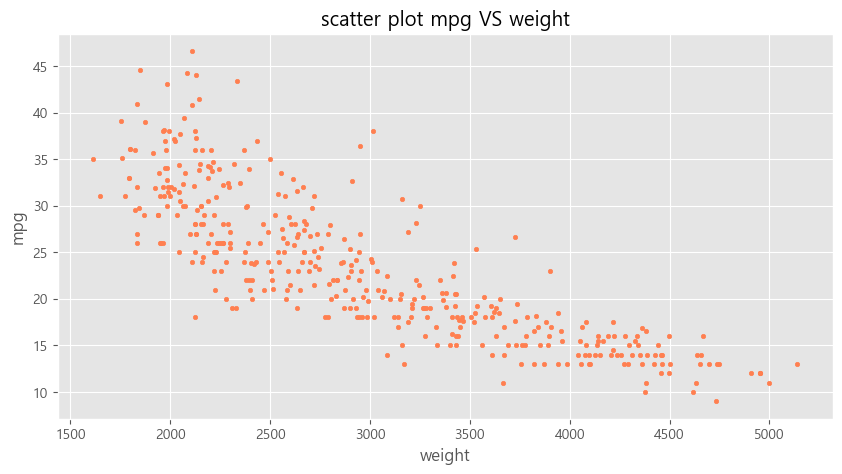

In [144]:
# 산점도 scatter
df.plot(x='weight', y = 'mpg', kind='scatter', c='coral', s=10, figsize=(10,5))
plt.title('scatter plot mpg VS weight')
plt.show()

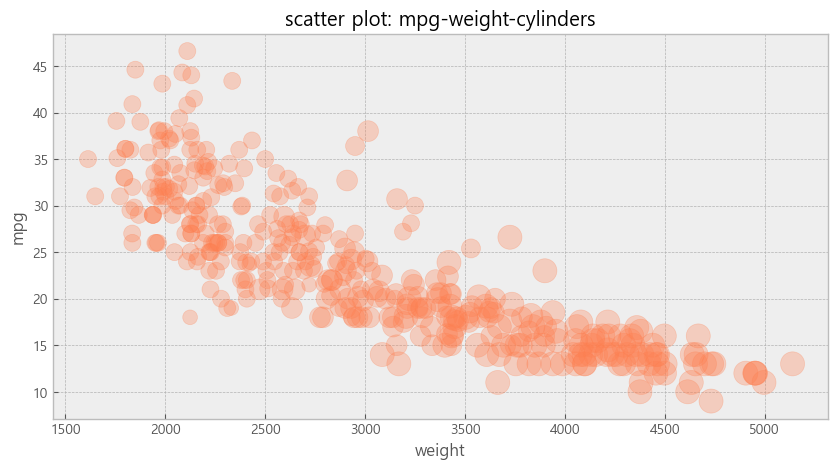

In [146]:
#버블차트
plt.style.use('bmh')
# 버블차트를 그리기 위해 cylinder 개수의 상대적 비율을 계산하여 시리즈 생성
cylinder_size = df.cylinders / df.cylinders.max() * 300
#plt.style.availalbe : 스타일 확인코드
df.plot(x='weight', y = 'mpg', kind='scatter', c='coral', s=cylinder_size,
        figsize=(10,5), alpha=0.3)
plt.title('scatter plot: mpg-weight-cylinders')
plt.show()

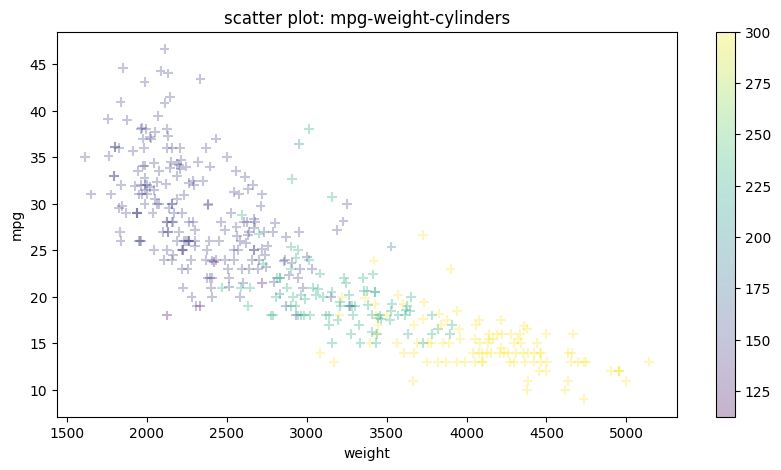

In [149]:
plt.style.use('default')
# 3개의 변수로 산점도 그리기
df.plot(x='weight', y = 'mpg', kind='scatter', c=cylinder_size, s=50, marker='+',
        figsize=(10,5), alpha=0.3, cmap= 'viridis')
#cmap은 color map 'viridis', 'jet'
plt.title('scatter plot: mpg-weight-cylinders')
plt.show()

In [150]:
# pie 차트
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin)

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7092\2368418905.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum()


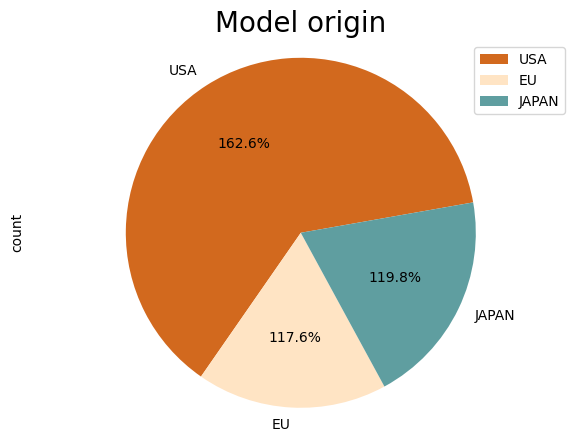

In [154]:
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin['count'].plot(kind='pie', figsize=(7,5), autopct='1%.1f%%',
                        startangle=10, #파이조각을 나누는 시작점(각도 표시)
                        colors = ['chocolate', 'bisque', 'cadetblue'] # 3개의 색상 리스트
                       )
plt.title('Model origin', size=20)
plt.axis('equal') #파이 차트의 비율을 같게(월에 가깝게 조정)
plt. legend(labels=df_origin.index, loc='upper right')
plt.show()

c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{

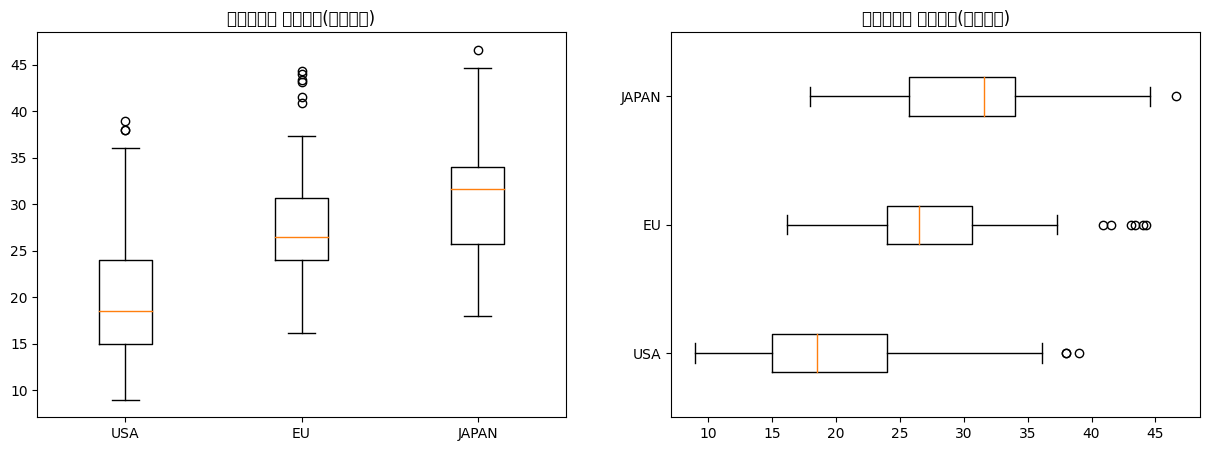

In [157]:
# box plot
# 그래프의 객체를 생성 (fig에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# ax 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], labels=['USA', 'EU', 'JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], labels=['USA', 'EU', 'JAPAN'],
           vert=False) #박스플롯을 옆으로 그리기
ax1.set_title('제조국가별 연비분포(수직박스)')
ax2.set_title('제조국가별 연비분포(수평박스)')
plt.show()